In [3]:
import  numpy as np #pip install numpy
import pandas as pd #pip install pandas
import matplotlib.pyplot as plt #pip install matplotlib
from collections import Counter #pip install collections
from sklearn.model_selection import train_test_split #pip install scikit-learn
print("Libraries have been loaded")

Libraries have been loaded


In [4]:
df = pd.read_csv('Data.csv')
X = df.drop('Label',axis=1).to_numpy()
y = df['Label'].to_numpy()
print(df)

     feature-1  feature-2  Label
0        -0.87       0.01    1.0
1         1.31       2.77    1.0
2         2.34       2.42    1.0
3         2.29      -0.40    1.0
4         0.94       0.48    1.0
..         ...        ...    ...
195      -2.33      -0.92    0.0
196      -0.74       1.97    0.0
197      -0.58       1.20    0.0
198       0.87       1.69    1.0
199       0.94       3.53    0.0

[200 rows x 3 columns]


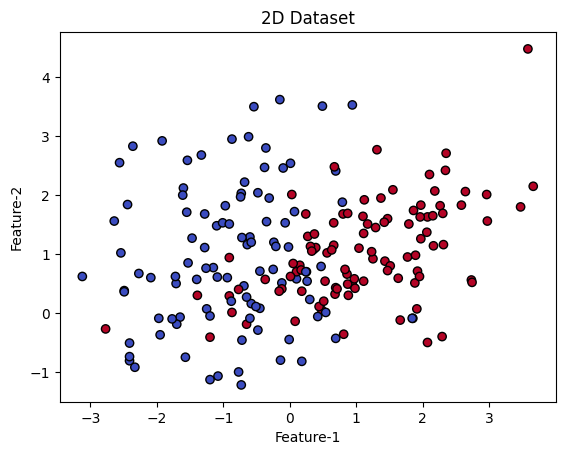

In [5]:
plt.Figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.coolwarm,edgecolors='k')
plt.title('2D Dataset')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)


In [7]:
def eucledian(a,b):
    # return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
    return np.sqrt(np.sum((a-b)**2))

def knn_predict(X_train,y_train,x_query,k):
    # distances=[]
    # for point in X_train:
    #     distance = eucledian(point,x_query)
    #     distances.append(distance)
    distances = [eucledian(x,x_query) for x in X_train]
    k_indices = np.argsort(distances)[:k]
    # k_labels=[]
    # for i in k_indices:
    #     x = y_train[i]
    #     k_labels.append(x)
    k_labels = [y_train[i] for i in k_indices]
    output_counter = Counter(k_labels)
    prediction = output_counter.most_common(1)[0][0]
    return int(prediction)

def predict_all(X_train,y_train,X_test,k):
    predictions=[]
    for x in X_test:
        prediction = knn_predict(X_train,y_train,x,k)
        predictions.append(prediction)
    return predictions

k=3
output = predict_all(X_train,y_train,X_test,k)
print("Predicted Class",output)
print("Actual Class:  ",[int(x) for x in y_test])

accuracy = np.mean(y_test==output)
print(f"My accuracy is:{accuracy*100:.2f}%")
    

Predicted Class [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1]
Actual Class:   [1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0]
My accuracy is:85.00%
